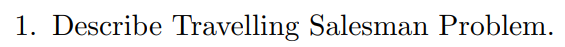

**Part1**

The Travelling Salesman Problem (TSP) is a classic optimization problem where the objective is to find the shortest possible route that visits a given set of cities (or nodes) exactly once and returns to the original city. This problem can be defined as follows:

Given:
- A set of cities $ C = \{1, 2, ..., n\} $, where $ n $ is the total number of cities.
- The distance or cost $ d_{ij} $ between each pair of cities $ i $ and $ j $, where $ d_{ij} $ represents the distance from city $ i $ to city $ j $.
- The goal is to find a permutation $ \pi $ of the cities that minimizes the total distance traveled.

Mathematically, the TSP can be formulated as an optimization problem:

Minimize:
$$ \sum_{(i,j) \in E} d_{ij} \times x_{ij} $$

Subject to:
1. Every city is visited exactly once:
$$ \sum_{j \in C, j \neq i} x_{ij} = 1 \text{ for all } i \in C $$
$$ \sum_{i \in C, i \neq j} x_{ij} = 1 \text{ for all } j \in C $$

2. Sub-tour elimination:
$$ \sum_{(i,j) \in \delta(S)} x_{ij} \geq 2 \text{ for all } \phi \subset S \subset C, \phi \neq \emptyset, S \neq C $$

3. Binary variable constraints:
$$ x_{ij} \in \{0, 1\} \text{ for all } (i,j) \in E $$

Where:
- $ x_{ij} $ is a binary decision variable representing whether the route includes the edge from city $ i $ to city $ j $.
- $ \delta(S) $ represents the set of edges incident to the vertices in subset $ S $ of cities.
- $ E $ represents the set of all possible edges between cities.

The objective is to minimize the total distance traveled, subject to the constraints that each city is visited exactly once and sub-tours are eliminated.

The TSP is NP-hard, meaning that there is no known polynomial-time algorithm to solve it optimally for all instances. Therefore, heuristic and approximation algorithms, such as simulated annealing, are often used to find near-optimal solutions.


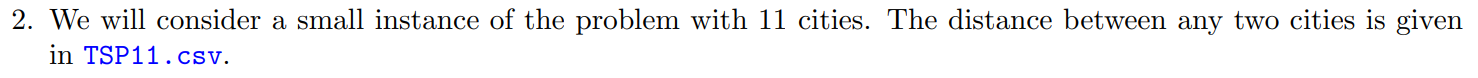

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('TSP11.csv',header=None)
df.index=[i for i in range(1,12)]
df.columns=[i for i in range(1,12)]
df

1   2   3   4   5   6    7   8    9   10  11
1     0  29  20  21  16  31  100  12    4  31  18
2    29   0  15  29  28  40   72  21   29  41  12
3    20  15   0  15  14  25   81   9   23  27  13
4    21  29  15   0   4  12   92  12   25  13  25
5    16  28  14   4   0  16   94   9   20  16  22
6    31  40  25  12  16   0   95  24   36   3  37
7   100  72  81  92  94  95    0  90  101  99  84
8    12  21   9  12   9  24   90   0   15  25  13
9     4  29  23  25  20  36  101  15    0  35  18
10   31  41  27  13  16   3   99  25   35   0  38
11   18  12  13  25  22  37   84  13   18  38   0

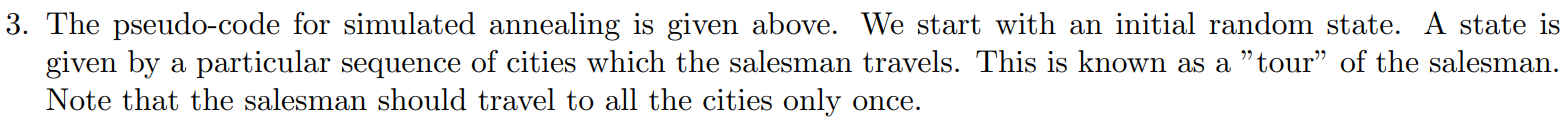

In [17]:
import random

In [18]:
def generate_initial_tour(num_cities):
    return random.sample(range(1, num_cities + 1), num_cities)
num_cities = len(df)
generate_initial_tour(num_cities)

[5, 7, 4, 2, 8, 10, 3, 9, 6, 1, 11]

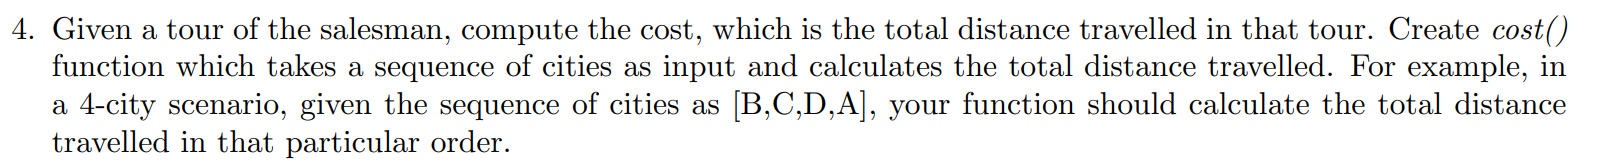

In [19]:
def cost_function(tour, cost_matrix):
    n = len(tour)
    feasible_edges = []
    for i in range(n-1):
        feasible_edges.append(tour[i:i+2])
    total_cost = 0
    for edge in feasible_edges:
        city_a = edge[0]
        city_b = edge[1]
        total_cost += cost_matrix.iloc[city_a - 1, city_b - 1]
    return total_cost

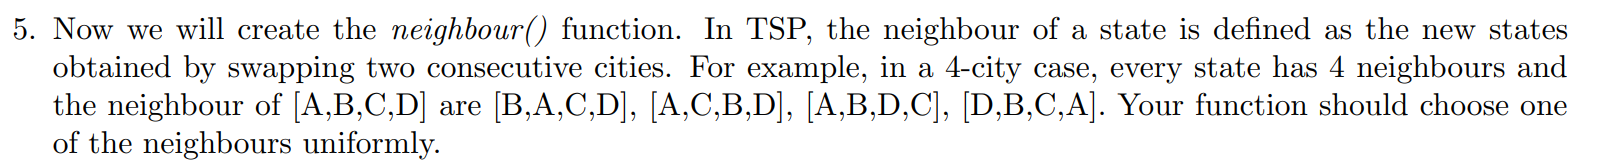

In [20]:
import random

In [21]:
def generate_neighbour(tour):
    index = random.randint(0, len(tour) - 2)
    new_tour = [city for city in tour]
    new_tour[index], new_tour[index + 1] = new_tour[index + 1], new_tour[index]

    return new_tour

current_tour = ['A', 'B', 'C', 'D']
new_tour = generate_neighbour(current_tour)
print("Neighbor tour:", new_tour)

Neighbor tour: ['B', 'A', 'C', 'D']


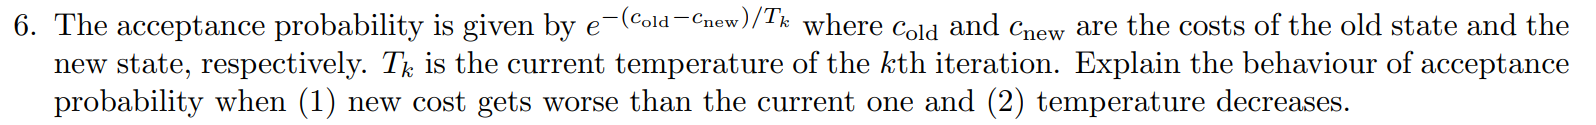

The acceptance probability in simulated annealing is a key factor that determines whether to accept a new solution that is worse than the current one. Let's discuss the behavior of acceptance probability in two scenarios:

When the new cost gets worse than the current one:

- In this case, the difference $(\text{current_cost} - \text{new_cost})$ will be a positive value, indicating that the new solution has a higher cost (or worse quality) compared to the current solution.
- As the temperature decreases, the value of $\frac{(\text{current_cost} - \text{new_cost})}{T_k}$ increases, since the denominator $T_k$ gets smaller.
- Consequently, the exponent $-\frac{(\text{current_cost} - \text{new_cost})}{T_k}$ becomes more negative, leading to a smaller acceptance probability.
- With a smaller acceptance probability, the likelihood of accepting the worse solution decreases as the temperature decreases, making it less likely to accept deteriorating solutions as the algorithm progresses.

When the temperature decreases:

- As the temperature decreases, the value of $-\frac{(\text{current_cost} - \text{new_cost})}{T_k}$ increases since the denominator $T_k$ gets smaller.
- A larger negative exponent leads to a smaller acceptance probability.
- Therefore, as the temperature decreases, the acceptance probability decreases as well.
- This behavior reflects the essence of simulated annealing, where initially, the algorithm explores a wider range of solutions, including worse ones, but gradually shifts towards accepting only better solutions as the temperature decreases.


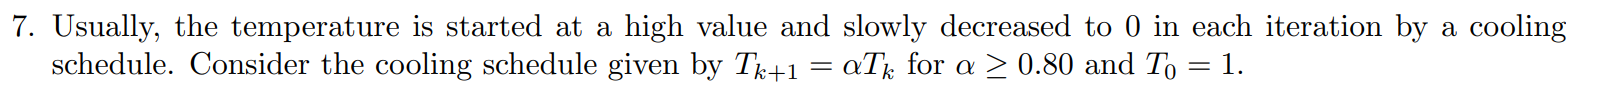

In [22]:
def cooling_schedule(Tk):
  return 0.8*Tk

def accept_prob(current_cost, neighbor_cost, Tk):
    return math.exp(-(neighbor_cost - current_cost) / Tk)

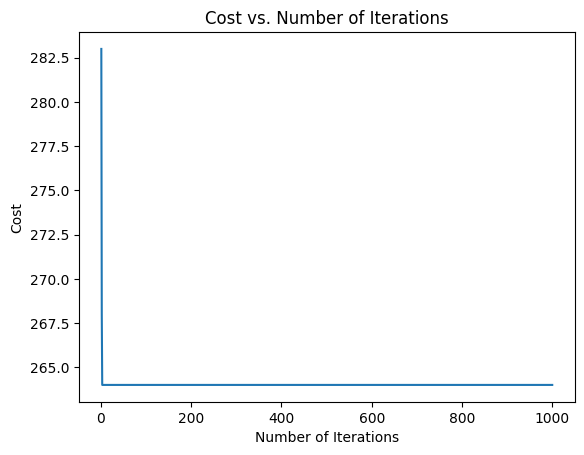

Optimal solution: [7, 11, 3, 6, 8, 9, 2, 4, 10, 5, 1]


In [24]:
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing_tsp(initial_solution, max_iter, cost_matrix, initial_temp):
    current_solution = initial_solution
    best_solution = current_solution
    T0 = initial_temp  # Initial temperature
    Tk = T0
    costs = []  # List to store costs per iteration
    for k in range(max_iter):
        neighbor_solution = generate_neighbour(current_solution)
        current_cost = cost_function(current_solution, cost_matrix)
        neighbor_cost = cost_function(neighbor_solution, cost_matrix)
        Tk = cooling_schedule(Tk)
        if neighbor_cost <= current_cost:
            current_solution = neighbor_solution
            if neighbor_cost < cost_function(best_solution, cost_matrix):
                best_solution = neighbor_solution
        else:
            acceptance_prob = accept_prob(current_cost, neighbor_cost, Tk)
            if random.random() < acceptance_prob:
                current_solution = neighbor_solution
        costs.append(current_cost)  # Append current cost to the list
    return best_solution, costs

# Example usage:
initial_solution = generate_initial_tour(11)
max_iter = 1000
cost_mat = df
initial_temp = 1
result, costs = simulated_annealing_tsp(initial_solution, max_iter, cost_mat, initial_temp)

# Plot cost against number of iterations
plt.plot(range(1, max_iter + 1), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations')
plt.show()

print("Optimal solution:", result)

Here we can see that as the number of iterations increasing the cost function readily decreasiong and become steadt after attaining a particular threshold for the iterations

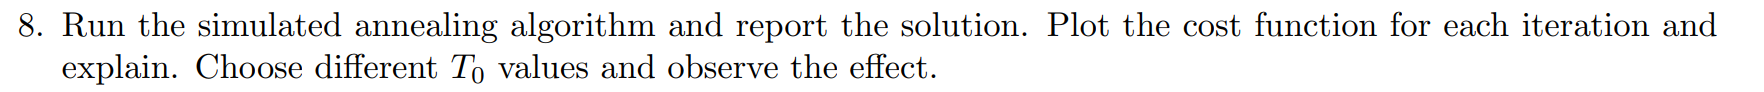

Cost vs Iterations for initial temperature=1:


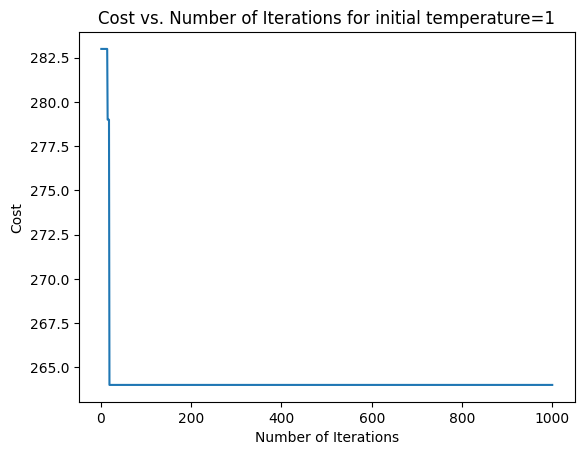

Optimal solution for initial temperature=1: [7, 11, 3, 6, 8, 9, 2, 4, 10, 5, 1]
Cost vs Iterations for initial temperature=2:


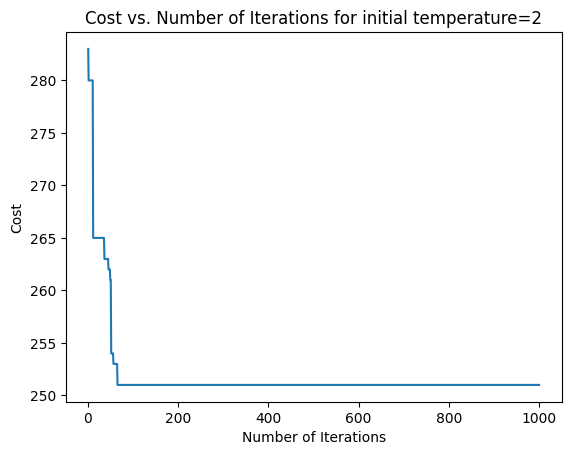

Optimal solution for initial temperature=2: [7, 6, 11, 2, 3, 8, 9, 10, 4, 5, 1]
Cost vs Iterations for initial temperature=0.5:


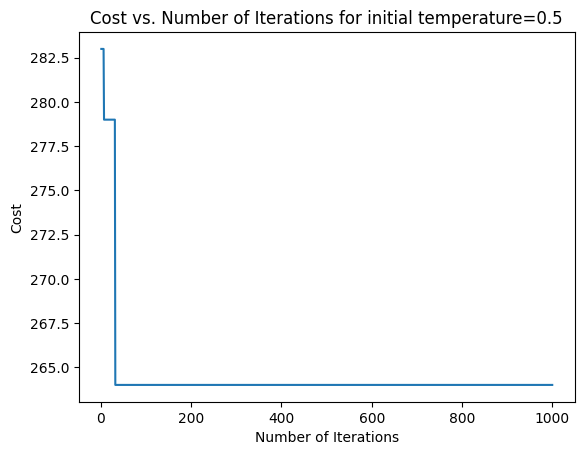

Optimal solution for initial temperature=0.5: [7, 11, 3, 6, 8, 9, 2, 4, 10, 5, 1]
Cost vs Iterations for initial temperature=4:


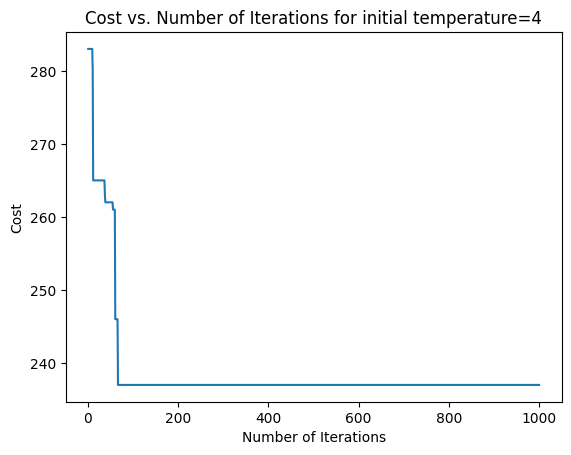

Optimal solution for initial temperature=4: [7, 6, 3, 2, 11, 9, 8, 4, 10, 5, 1]
Cost vs Iterations for initial temperature=10:


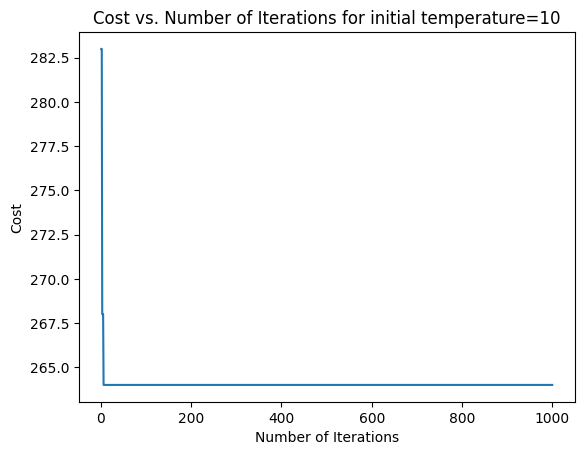

Optimal solution for initial temperature=10: [7, 11, 3, 6, 8, 9, 2, 10, 4, 5, 1]
Cost vs Iterations for initial temperature=0.1:


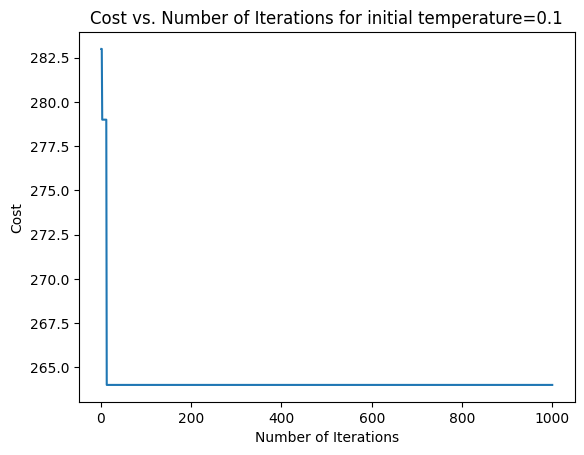

Optimal solution for initial temperature=0.1: [7, 11, 3, 6, 8, 9, 2, 4, 10, 5, 1]


In [25]:
list_initial_temperatures = [1, 2, 0.5, 4, 10, 0.1]
for initial_temp in list_initial_temperatures:
    optimal_solution, costs = simulated_annealing_tsp(initial_solution, max_iter, cost_mat, initial_temp)
    print(f"Cost vs Iterations for initial temperature={initial_temp}:")
    plt.plot(range(1, max_iter + 1), costs)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Number of Iterations for initial temperature={initial_temp}')
    plt.show()

    print(f"Optimal solution for initial temperature={initial_temp}: {optimal_solution}")

Here we can observe that as we decrease the value of temperature, the cost steadily decreases compared to larger values of temperature. This implies that if we choose a relatively smaller value of temperature, the cost achieves its minimum after just a few iterations and then remains relatively constant.

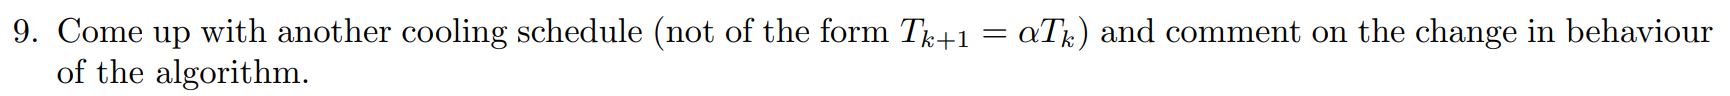

In [29]:
# Doing the same for a different cooling schedule
def cooling_schedule_diff(Tk, k):
    return Tk / k

def simulated_annealing_tsp_different_schedule(initial_solution, max_iter, cost_matrix, initial_temp):
    current_solution = initial_solution
    best_solution = current_solution
    T0 = initial_temp  # Initial temperature
    Tk = T0
    costs = []  # List to store costs per iteration
    for k in range(max_iter):
        neighbor_solution = generate_neighbour(current_solution)
        current_cost = cost_function(current_solution, cost_matrix)
        neighbor_cost = cost_function(neighbor_solution, cost_matrix)
        Tk = cooling_schedule_diff(Tk, k + 1)
        if neighbor_cost <= current_cost:
            current_solution = neighbor_solution
            if neighbor_cost < cost_function(best_solution, cost_matrix):
                best_solution = neighbor_solution
        else:
            acceptance_prob = accept_prob(current_cost, neighbor_cost, Tk)
            if random.random() < acceptance_prob:
                current_solution = neighbor_solution
        costs.append(current_cost)  # Append current cost to the list
    return best_solution, costs


<ipython-input-22-ee4c98278fcc>:5: RuntimeWarning: overflow encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)
<ipython-input-22-ee4c98278fcc>:5: RuntimeWarning: divide by zero encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)


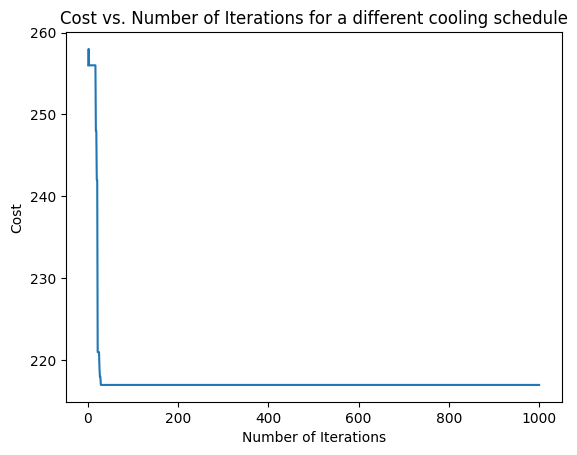

Optimal solution for a different cooling schedule: [3, 2, 11, 9, 5, 4, 6, 10, 1, 8, 7]


In [30]:
# Example usage:
initial_solution = generate_initial_tour(11)
max_iter = 1000
cost_matrix = df
initial_temp = 1
result1, costs1 = simulated_annealing_tsp_different_schedule(initial_solution, max_iter, cost_matrix, initial_temp)

# Plot cost against number of iterations
plt.plot(range(1, max_iter + 1), costs1)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a different cooling schedule')
plt.show()

print("Optimal solution for a different cooling schedule:", result1)

Here, I have implemented a cooling schedule where the temperature decreases as Tk/k at each iteration. We can observe that the cost has decreased significantly; previously it was around 265, and now it is below 220. This indicates that the alternative cooling schedule has led to improved optimization, resulting in a lower cost

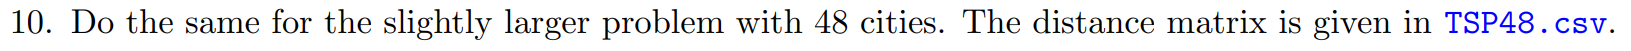

In [31]:
df2=pd.read_csv('TSP48.csv',header=None)
df2.index=[i for i in range(1,49)]
df2.columns=[i for i in range(1,49)]
df2

1     2     3     4     5     6     7     8     9     10  ...    39  \
1      0  4727  1205  6363  3657  3130  2414   563   463  5654  ...  3530   
2   4727     0  3588  2012  1842  6977  6501  5187  5028  2327  ...  3085   
3   1205  3588     0  5163  2458  3678  3071  1742  1444  4462  ...  2482   
4   6363  2012  5163     0  2799  8064  7727  6878  6581  1402  ...  3669   
5   3657  1842  2458  2799     0  5330  4946  4200  3824  2012  ...  1252   
6   3130  6977  3678  8064  5330     0   743  3209  2670  6929  ...  4435   
7   2414  6501  3071  7727  4946   743     0  2468  1952  6673  ...  4185   
8    563  5187  1742  6878  4200  3209  2468     0   718  6203  ...  4091   
9    463  5028  1444  6581  3824  2670  1952   718     0  5789  ...  3543   
10  5654  2327  4462  1402  2012  6929  6673  6203  5789     0  ...  2497   
11  1713  4148  1184  5366  2573  2831  2380  2241  1602  4392  ...  1997   
12  1604  4723  1520  5946  3157  2266  1795  2051  1343  4947  ...  2506   
13  2368  3635  1498  4679  1924  3407  3051  2920  2330  3648  ...  1232   
14  2201  3125  1103  4378  1580  3854  3405  2762  2291  3501  ...  1380   
15  1290  4907  1501  6225  3427  2178  1604  1687   970  5274  ...  2867   
16  1004  3930   951  5709  3179  4076  3382  1304  1451  5183  ...  3398   
17  3833  7463  4298  8417  5749   727  1469  3932  3376  7216  ...  4752   
18  2258  6338  2903  7578  4793   881   168  2331  1796  6535  ...  4051   
19  3419  7243  3967  8296  5577   293  1020  3487  2959  7140  ...  4652   
20  2267  5105  2169  6135  3409  1930  1681  2669  1951  5022  ...  2525   
21  2957  4043  2209  4802  2223  3310  3110  3487  2835  3621  ...  1136   
22   720  4022   652  5707  3066  3672  2993  1175  1112  5077  ...  3132   
23  1700  3677   828  4982  2185  3315  2827  2260  1725  4090  ...  1833   
24  5279  2863  4136  2322  1860  6199  6009  5840  5346   922  ...  1852   
25  2578  3106  1518  4178  1401  3932  3552  3141  2628  3207  ...   967   
26  6076  1850  4873   320  2491  7745  7412  6596  6285  1131  ...  3349   
27  3465  7173  3954  8186  5486   365  1104  3563  3007  7014  ...  4532   
28  2654  6630  3254  7800  5035   482   267  2728  2193  6714  ...  4218   
29  3625  1204  2446  2778   894  5774  5300  4120  3889  2437  ...  2096   
30  3115  6814  3581  7859  5141   261   821  3240  2661  6707  ...  4216   
31  1574  6001  2441  7408  4611  1659   916  1559  1122  6477  ...  4062   
32  3951  3447  2960  3763  1669  4513  4348  4507  3920  2476  ...   533   
33  1748  5253  1966  6461  3677  1746  1270  2082  1372  5432  ...  2963   
34  2142  2656   950  4223  1590  4431  3890  2658  2391  3599  ...  1981   
35  6755  3123  5564  1427  3113  7910  7698  7304  6883  1102  ...  3515   
36  2383  6274  2916  7451  4682   769   332  2512  1927  6376  ...  3883   
37  3306  7183  3878  8263  5533   207   900  3364  2845  7121  ...  4629   
38  1029  5622  2035  7131  4352  2225  1484   985   611  6284  ...  3952   
39  3530  3085  2482  3669  1252  4435  4185  4091  3543  2497  ...     0   
40   825  4564  1027  6011  3227  2681  2049  1319   676  5160  ...  2873   
41  2188  2756  1395  4638  2426  5053  4415  2544  2590  4318  ...  3080   
42  4820  1591  3617  1681  1169  6384  6051  5358  4993   937  ...  2012   
43  3489  7027  3891  7987  5313   550  1219  3632  3039  6795  ...  4324   
44  1947  6186  2686  7502  4706  1224   482  1987  1486  6507  ...  4046   
45  6835  3472  5661  1877  3241  7805  7635  7391  6934  1268  ...  3478   
46  1542  5461  2023  6758  3962  1670  1054  1785  1112  5773  ...  3328   
47  2379  4390  1867  5360  2651  2704  2432  2879  2196  4249  ...  1755   
48  3744  2088  2560  2844   304  5230  4884  4296  3876  1914  ...  1000   

      40    41    42    43    44    45    46    47    48  
1    825  2188  4820  3489  1947  6835  1542  2379  3744  
2   4564  2756  1591  7027  6186  3472  5461  4390  2088  
3   1027  1395  3617  3891  2686  5661  2023  1867  256

<ipython-input-22-ee4c98278fcc>:5: RuntimeWarning: overflow encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)
<ipython-input-22-ee4c98278fcc>:5: RuntimeWarning: divide by zero encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)


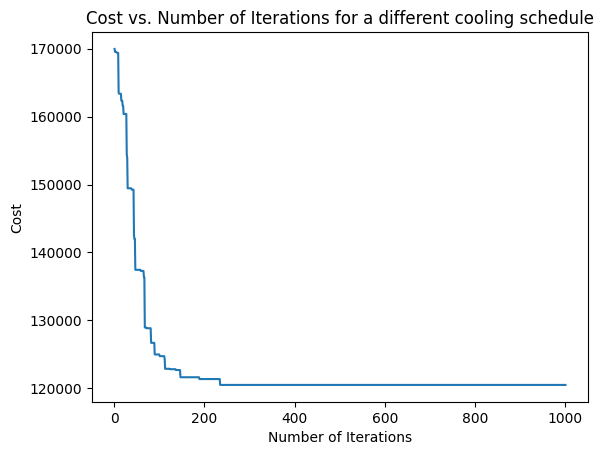

Optimal solution: [30, 10, 14, 7, 13, 45, 28, 16, 41, 2, 33, 19, 31, 5, 4, 34, 46, 21, 25, 48, 39, 20, 43, 36, 8, 23, 35, 24, 11, 22, 1, 9, 38, 37, 17, 40, 29, 26, 42, 32, 27, 18, 44, 3, 47, 12, 15, 6]


In [32]:
# Implementing the algorithm
num_cities = len(df2)
initial_solution = generate_initial_tour(num_cities)

max_iter = 1000
cost_matrix = df2
initial_temp = 1
result2, costs2 = simulated_annealing_tsp_different_schedule(initial_solution, max_iter, cost_matrix, initial_temp)

# Plot cost against number of iterations
plt.plot(range(1, max_iter + 1), costs2)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a different cooling schedule')
plt.show()

print("Optimal solution:", result2)

Here in case of 48 cities te cost function reduces gradually upto 230 iterations and it become steady after that

<ipython-input-22-ee4c98278fcc>:5: RuntimeWarning: overflow encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)
<ipython-input-22-ee4c98278fcc>:5: RuntimeWarning: divide by zero encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)


Cost vs Iterations for initial temperature=1:


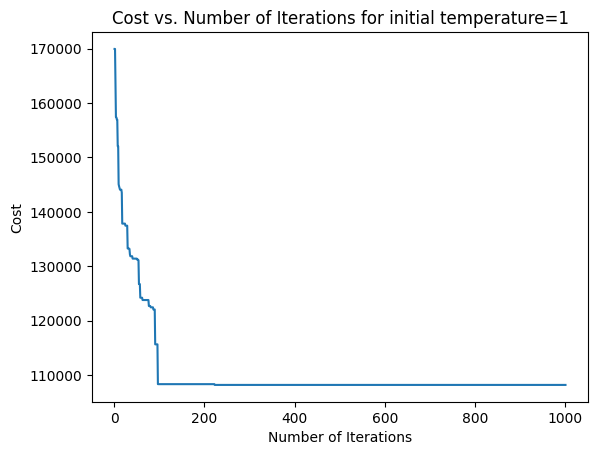

Optimal solution for initial temperature=1: [10, 30, 7, 13, 14, 45, 41, 16, 28, 19, 33, 5, 2, 4, 21, 46, 31, 34, 25, 48, 39, 20, 43, 36, 23, 22, 8, 11, 24, 35, 1, 38, 37, 17, 9, 40, 29, 26, 42, 32, 27, 18, 44, 15, 3, 47, 12, 6]
Cost vs Iterations for initial temperature=2:


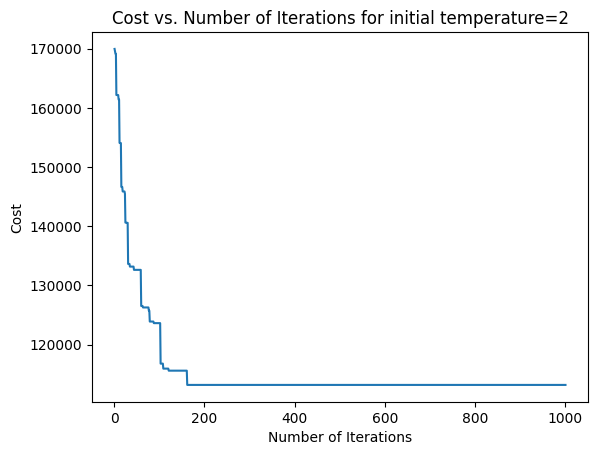

Optimal solution for initial temperature=2: [30, 10, 14, 7, 13, 45, 41, 16, 28, 19, 31, 33, 2, 4, 5, 21, 46, 34, 25, 48, 39, 20, 43, 36, 23, 8, 22, 35, 24, 11, 1, 38, 37, 17, 9, 40, 29, 26, 42, 32, 27, 18, 44, 15, 12, 3, 47, 6]
Cost vs Iterations for initial temperature=0.5:


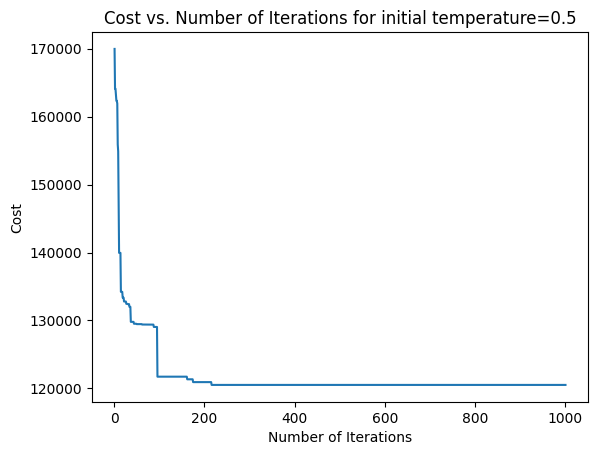

Optimal solution for initial temperature=0.5: [10, 30, 7, 13, 45, 14, 16, 28, 33, 2, 41, 31, 19, 4, 5, 25, 21, 46, 34, 48, 39, 20, 43, 36, 8, 22, 11, 23, 35, 24, 17, 9, 1, 38, 37, 40, 29, 26, 42, 32, 27, 18, 44, 12, 47, 3, 15, 6]
Cost vs Iterations for initial temperature=4:


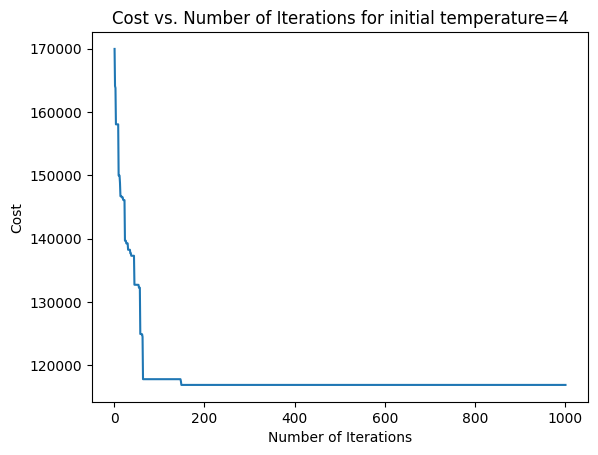

Optimal solution for initial temperature=4: [10, 30, 7, 13, 45, 14, 16, 28, 33, 41, 2, 5, 31, 19, 21, 4, 25, 46, 34, 48, 39, 20, 43, 36, 8, 22, 23, 35, 24, 11, 1, 38, 37, 17, 9, 40, 29, 26, 42, 32, 27, 18, 44, 12, 47, 3, 15, 6]
Cost vs Iterations for initial temperature=10:


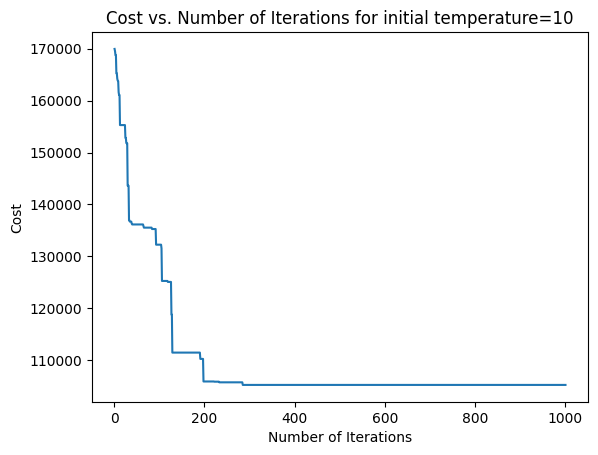

Optimal solution for initial temperature=10: [30, 7, 13, 14, 10, 45, 33, 28, 16, 41, 2, 4, 5, 19, 31, 46, 21, 25, 34, 48, 39, 20, 43, 36, 23, 22, 8, 11, 35, 24, 17, 9, 1, 38, 37, 40, 29, 26, 42, 32, 27, 18, 44, 15, 12, 3, 47, 6]
Cost vs Iterations for initial temperature=0.1:


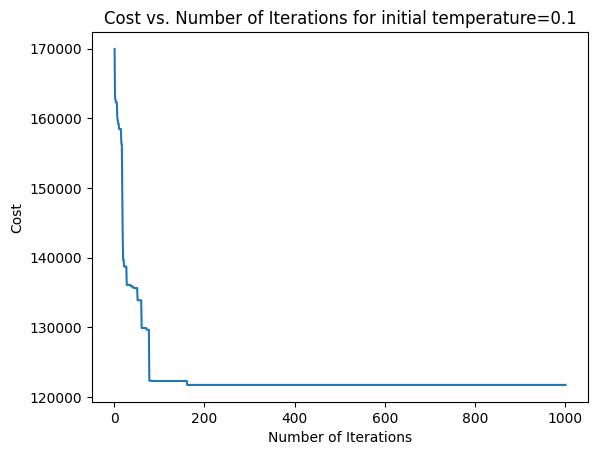

Optimal solution for initial temperature=0.1: [30, 10, 14, 7, 13, 45, 28, 16, 41, 19, 33, 2, 4, 5, 21, 46, 31, 34, 25, 48, 39, 20, 43, 36, 8, 22, 11, 23, 35, 24, 17, 9, 1, 38, 37, 40, 29, 26, 42, 32, 27, 18, 44, 15, 3, 47, 12, 6]


In [33]:
# Doing it for different values of initial temperature
list_initial_temperatures = [1, 2, 0.5, 4, 10, 0.1]
for initial_temp in list_initial_temperatures:
    optimal_solution, costs = simulated_annealing_tsp_different_schedule(initial_solution, max_iter, cost_matrix, initial_temp)
    print(f"Cost vs Iterations for initial temperature={initial_temp}:")
    plt.plot(range(1, max_iter + 1), costs)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Number of Iterations for initial temperature={initial_temp}')
    plt.show()

    print(f"Optimal solution for initial temperature={initial_temp}: {optimal_solution}")

Here, we observe that for smaller values of temperature, the cost value reaches its minimum more rapidly compared to larger values of temperatures. This implies that the number of iterations required to reach a feasible route for smaller values of temperature is fewer compared to larger values of temperatures.

<ipython-input-22-ee4c98278fcc>:5: RuntimeWarning: overflow encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)
<ipython-input-22-ee4c98278fcc>:5: RuntimeWarning: divide by zero encountered in divide
  return math.exp(-(neighbor_cost - current_cost) / Tk)


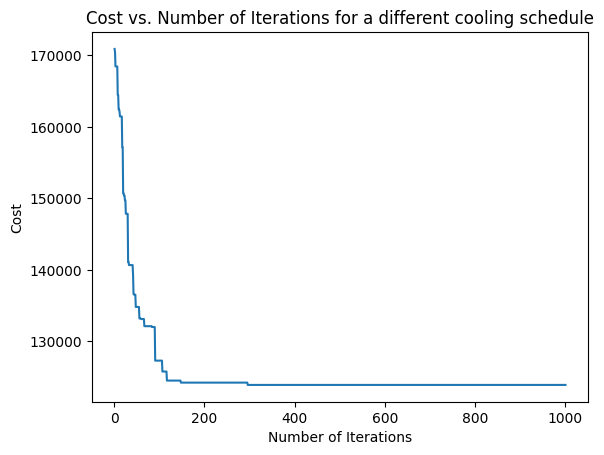

Optimal solution: [48, 23, 47, 33, 46, 40, 41, 22, 6, 19, 7, 8, 1, 5, 42, 13, 31, 28, 30, 17, 27, 16, 4, 12, 36, 38, 2, 15, 18, 45, 25, 44, 34, 35, 11, 20, 43, 21, 32, 24, 29, 9, 37, 14, 26, 10, 39, 3]


In [34]:
# Example usage:
initial_solution = generate_initial_tour(48)
max_iter = 1000
cost_matrix = df2
initial_temp = 1
result2, costs2 = simulated_annealing_tsp_different_schedule(initial_solution, max_iter, cost_matrix, initial_temp)

# Plot cost against number of iterations
plt.plot(range(1, max_iter + 1), costs2)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a different cooling schedule')
plt.show()

print("Optimal solution:", result2)